In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist 
import matplotlib.pyplot as plt 

In [5]:
class Convolution:
    def __init__(self, stride=1, paddings=0, filter_size=3, n_filters=1):
        self.n_filters = n_filters
        self.filter_size = filter_size
        self.paddings = paddings
        self.stride = stride
        self.feature_map = None
        self.filters = None

    def train(self, img):
        img = tf.convert_to_tensor(img, dtype=tf.float32)
        img = tf.expand_dims(img, axis=-1)  # Add channel dimension (H, W, 1)

        # Initialize filters
        self.filters = tf.random.normal(shape=(self.filter_size, self.filter_size, 1, self.n_filters))

        # Dimensions
        n = img.shape[0]
        sh = int((n + 2 * self.paddings - self.filter_size) / self.stride) + 1
        paddings = tf.constant([[self.paddings, self.paddings], [self.paddings, self.paddings], [0, 0]])

        # Padding
        padded_img = tf.pad(img, paddings, mode='CONSTANT', constant_values=0)

        # Feature map initialization
        self.feature_map = tf.Variable(initial_value=tf.zeros((sh, sh, self.n_filters)), trainable=True)

        # Convolution operation
        for i in range(sh):
            for j in range(sh):
                row, col = i * self.stride, j * self.stride
                region = padded_img[row:row + self.filter_size, col:col + self.filter_size, :]
                for k in range(self.n_filters):
                    self.feature_map[i, j, k].assign(tf.nn.tanh(tf.reduce_sum(region * self.filters[:, :, :, k])))

    # Plot feature maps
    def plot_feature_maps(self):
        num_filters = self.feature_map.shape[-1]
        grid_size = int(tf.math.ceil(tf.math.sqrt(float(num_filters))))  # Cast to float
    
        plt.figure(figsize=(10, 10))
        for i in range(num_filters):
            plt.subplot(grid_size, grid_size, i + 1)
            plt.imshow(self.feature_map[:, :, i].numpy(), cmap='gray')  # Convert TensorFlow tensor to NumPy array
            plt.axis('off')
            plt.title(f"Filter {i + 1}")
        plt.tight_layout()
        plt.show()


In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
conv = Convolution(stride=1, paddings=2, filter_size=3, n_filters=9)

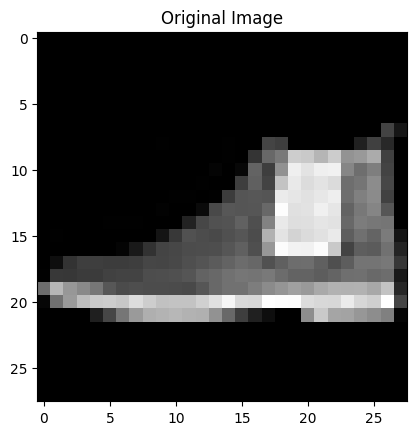

In [12]:
# original image
plt.imshow(x_train[111],cmap='grey')
plt.title("Original Image")
plt.show()

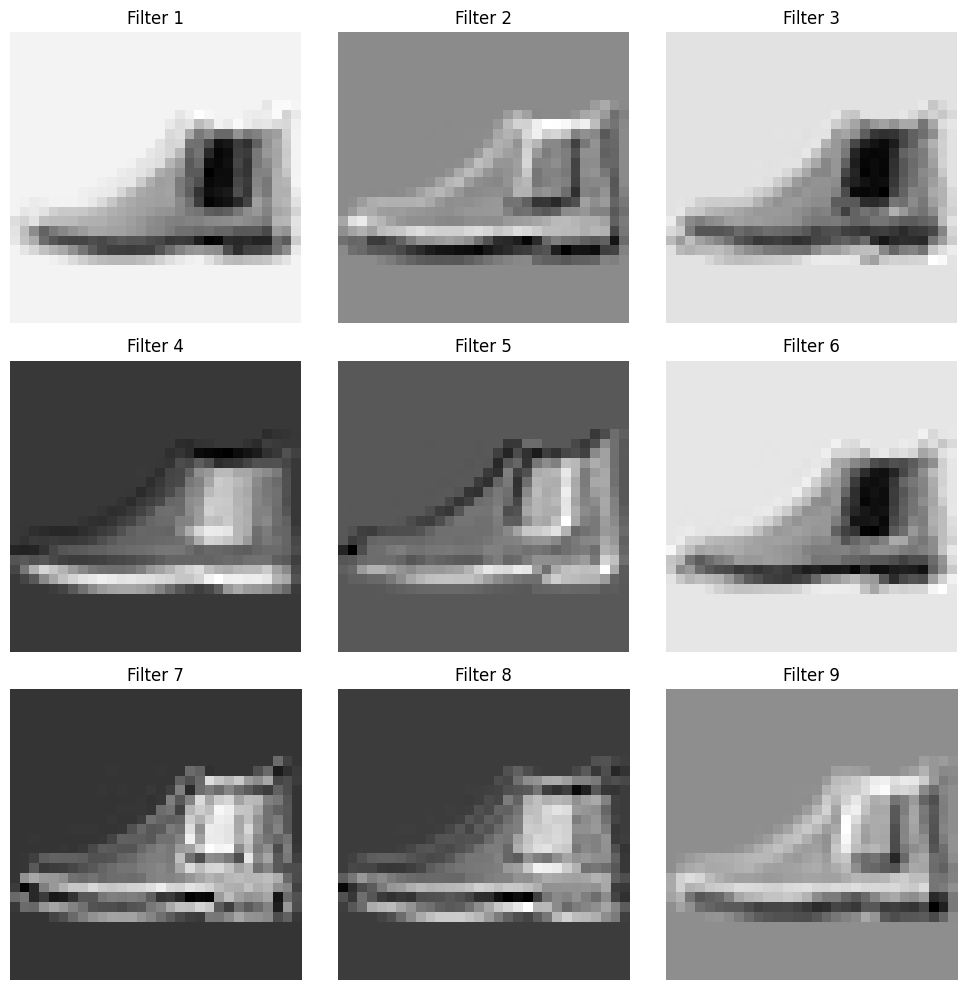

In [13]:
# convulation operation
conv.train(x_train[111])
conv.plot_feature_maps()